<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/covid_19_V1_2_lightGBM_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [1]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!rm -r curated_data
!rm meta_data_cap.csv
!rm meta_data_covid.csv
!rm meta_data_normal.csv

In [3]:
%cd /content/

# !unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip'

!unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' meta_data_normal.csv meta_data_covid.csv meta_data_cap.csv


/content
Archive:  /content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip
  inflating: meta_data_cap.csv       
  inflating: meta_data_covid.csv     
  inflating: meta_data_normal.csv    


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data as dataframes
df_meta_cap = pd.read_csv('meta_data_cap.csv')
df_meta_covid = pd.read_csv('meta_data_covid.csv', encoding = "ISO-8859-1")
df_meta_normal = pd.read_csv('meta_data_normal.csv')

### Analysis of df_meta_cap

In [7]:
# Get some information about df_meta_cap
print(df_meta_cap.info())
display(df_meta_cap.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2618 non-null   int64  
 1   File name                    2618 non-null   object 
 2   Patient ID                   2618 non-null   object 
 3   Slices_x                     2618 non-null   int64  
 4   Columns                      2618 non-null   int64  
 5   Date of Last Calibration     2618 non-null   int64  
 6   Diagnosis                    2618 non-null   object 
 7   Distance Source to Detector  2618 non-null   int64  
 8   Distance Source to Patient   2618 non-null   int64  
 9   Exposure Time                2618 non-null   int64  
 10  KVP                          2618 non-null   int64  
 11  Age                          2618 non-null   int64  
 12  Gender                       2618 non-null   object 
 13  Rows              

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country
0,0,cap006_10.png,cap006,10,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
1,1,cap006_11.png,cap006,11,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
2,2,cap006_12.png,cap006,12,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
3,3,cap006_14.png,cap006,14,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
4,4,cap006_15.png,cap006,15,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran


In [8]:
df_meta_cap.loc[df_meta_cap.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country


In [9]:
df_meta_cap['Country'].unique()     # unique countries

array(['Iran'], dtype=object)

In [10]:
df_meta_cap['Patient ID'].nunique() # number of unique patients

54

In [11]:
df_meta_cap['Age'].unique()         # unique ages

array([71, 54, 38, 68, 84, 65, 94, 44, 29, 87, 13, 59, 40, 52, 34, 22, 32,
       25, 80, 46, 70, 21, 51, 30, 26, 76, 56, 62, 77, 75, 39, 83, 48, 73,
       74, 55, 93, 37, 89, 58, 67, 12])

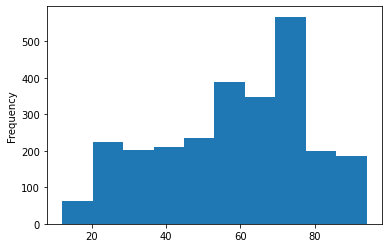

In [12]:
# Display age distribution
df_meta_cap.Age.plot(kind='hist')
plt.show()

### Analysis of df_meta_covid

In [13]:
df_meta_covid.loc[df_meta_covid.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu


In [14]:
# Get some information about df_meta_covid
print(df_meta_covid.info())
display(df_meta_covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7593 non-null   int64  
 1   File name                    7593 non-null   object 
 2   Patient ID                   7593 non-null   object 
 3   Gender                       7593 non-null   object 
 4   Age                          7593 non-null   object 
 5   Country                      7593 non-null   object 
 6   Diagnosis                    7593 non-null   object 
 7   Slice                        7210 non-null   float64
 8   Case Discussion              493 non-null    object 
 9   Case Number                  1944 non-null   object 
 10  Columns                      3815 non-null   float64
 11  Date                         4491 non-null   object 
 12  Date of Last Calibration     3815 non-null   float64
 13  Distance Source to

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu
0,0,6_Rahimzadeh_137covid_patient101_SR_4_IM00006.png,patient101,F,51,Iran,COVID-19,6.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6_Rahimzadeh_137covid_patient101_SR_4_IM00008.png,patient101,F,51,Iran,COVID-19,8.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6_Rahimzadeh_137covid_patient101_SR_4_IM00009.png,patient101,F,51,Iran,COVID-19,9.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6_Rahimzadeh_137covid_patient101_SR_4_IM00010.png,patient101,F,51,Iran,COVID-19,10.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6_Rahimzadeh_137covid_patient101_SR_4_IM00011.png,patient101,F,51,Iran,COVID-19,11.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_meta_covid['Country'].unique()     # unique countries

array(['Iran', 'Italy', 'China', '-', 'Turkey', 'Ukraine', 'Belgium',
       'South Korea', 'Taiwan', 'Spain', 'Portugal', 'Greece', 'Russia',
       'Japan'], dtype=object)

In [16]:
df_meta_covid['Patient ID'].nunique() # number of unique patients

464

## Christoph: Train-Test-Split

In [ ]:
from timeit import default_timer as timer
start = timer()

In [17]:
# !ls curated_data/curated_data/1NonCOVID/
# !ls curated_data/curated_data/2COVID/
# !ls curated_data/curated_data/3CAP/

np.random.seed(13)

# Configuration of sizes
test_size = 0.1
validation_size = 0.1
train_size = 1 - test_size - validation_size


In [18]:


# 1NonCOVID - df_meta_normal

# Define lists and length of train, test, split sets
patient_ids_noncovid_all = df_meta_normal['Patient ID'].unique()
len_noncovid_all = len(patient_ids_noncovid_all)

# Test set
print(f"len patient_ids_noncovid_all: {len_noncovid_all}")
len_noncovid_test = int(len_noncovid_all // (1 / test_size))
patient_ids_noncovid_test = np.random.choice(patient_ids_noncovid_all, len_noncovid_test, replace=False)
patient_ids_remaining = list(set(patient_ids_noncovid_all) - set(patient_ids_noncovid_test))
print(f"len patient_ids_noncovid_test: {len_noncovid_test}, {len(patient_ids_noncovid_test)}")
# Validation set
len_noncovid_validation = int(len_noncovid_all // (1 / validation_size))
patient_ids_noncovid_validation = np.random.choice(patient_ids_remaining, len_noncovid_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_noncovid_validation))
print(f"len patient_ids_noncovid_validation: {len_noncovid_validation}, {len(patient_ids_noncovid_validation)}")
# Train set
len_noncovid_train = len_noncovid_all - len_noncovid_test - len_noncovid_validation
patient_ids_noncovid_train = patient_ids_remaining
print(f"len patient_ids_noncovid_train: {len_noncovid_train}, {len(patient_ids_noncovid_train)}")


len patient_ids_noncovid_all: 604
len patient_ids_noncovid_test: 60, 60
len patient_ids_noncovid_validation: 60, 60
len patient_ids_noncovid_train: 484, 484


In [19]:


# 2COVID

# Define lists and length of train, test, split sets
patient_ids_covid_all = df_meta_covid['Patient ID'].unique()
len_covid_all = len(patient_ids_covid_all)

# Test set
print(f"len patient_ids_covid_all: {len_covid_all}")
len_covid_test = int(len_covid_all // (1 / test_size))
patient_ids_covid_test = np.random.choice(patient_ids_covid_all, len_covid_test, replace=False)
patient_ids_remaining = list(set(patient_ids_covid_all) - set(patient_ids_covid_test))
print(f"len patient_ids_covid_test: {len_covid_test}, {len(patient_ids_covid_test)}")
# Validation set
len_covid_validation = int(len_covid_all // (1 / validation_size))
patient_ids_covid_validation = np.random.choice(patient_ids_remaining, len_covid_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_covid_validation))
print(f"len patient_ids_covid_validation: {len_covid_validation}, {len(patient_ids_covid_validation)}")
# Train set
len_covid_train = len_covid_all - len_covid_test - len_covid_validation
patient_ids_covid_train = patient_ids_remaining
print(f"len patient_ids_covid_train: {len_covid_train}, {len(patient_ids_covid_train)}")


len patient_ids_covid_all: 464
len patient_ids_covid_test: 46, 46
len patient_ids_covid_validation: 46, 46
len patient_ids_covid_train: 372, 372


In [20]:


# 3CAP - df_meta_cap

# Define lists and length of train, test, split sets
patient_ids_cap_all = df_meta_cap['Patient ID'].unique()
len_cap_all = len(patient_ids_cap_all)

# Test set
print(f"len patient_ids_cap_all: {len_cap_all}")
len_cap_test = int(len_cap_all // (1 / test_size))
patient_ids_cap_test = np.random.choice(patient_ids_cap_all, len_cap_test, replace=False)
patient_ids_remaining = list(set(patient_ids_cap_all) - set(patient_ids_cap_test))
print(f"len patient_ids_cap_test: {len_cap_test}, {len(patient_ids_cap_test)}")
# Validation set
len_cap_validation = int(len_cap_all // (1 / validation_size))
patient_ids_cap_validation = np.random.choice(patient_ids_remaining, len_cap_validation, replace=False)
patient_ids_remaining = list(set(patient_ids_remaining) - set(patient_ids_cap_validation))
print(f"len patient_ids_cap_validation: {len_cap_validation}, {len(patient_ids_cap_validation)}")
# Train set
len_cap_train = len_cap_all - len_cap_test - len_cap_validation
patient_ids_cap_train = patient_ids_remaining
print(f"len patient_ids_cap_train: {len_cap_train}, {len(patient_ids_cap_train)}")


len patient_ids_cap_all: 54
len patient_ids_cap_test: 5, 5
len patient_ids_cap_validation: 5, 5
len patient_ids_cap_train: 44, 44


In [21]:
import glob


# ... split into Train, Validation and Test ...

# List of classes
classes_list = ['1NonCOVID', '2COVID', '3CAP']
# Classes -> DataFrame
dict_case_df = {'1NonCOVID':df_meta_normal, '2COVID':df_meta_covid, '3CAP':df_meta_cap}
# Classes -> patient ID list
dict_case_patient_ids_test = {'1NonCOVID':patient_ids_noncovid_test, '2COVID':patient_ids_covid_test, '3CAP':patient_ids_cap_test}
dict_case_patient_ids_validation = {'1NonCOVID':patient_ids_noncovid_validation, '2COVID':patient_ids_covid_validation, '3CAP':patient_ids_cap_validation}
dict_case_patient_ids_train = {'1NonCOVID':patient_ids_noncovid_train, '2COVID':patient_ids_covid_train, '3CAP':patient_ids_cap_train}


# # # Create directories
!mkdir /content/curated_data
!mkdir /content/curated_data/curated_data


source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
!mkdir $train_dir
!mkdir $test_dir
!mkdir $validation_dir

# create subdirectories for each class
for cl in classes_list:
  c_train = str(train_dir + cl)
  !mkdir $c_train
  c_test = str(test_dir + cl)
  !mkdir $c_test
  c_validation = str(validation_dir + cl)
  !mkdir $c_validation


In [22]:
# move files into subdirectories
for c in classes_list:
  # Create list of all filenames for current class
  files_pattern = str(source_dir + c + '/*.png')
  class_files_list = glob.glob(files_pattern)  

  print(class_files_list)
  print(c)

  path_str = "curated_data/curated_data/"

  # Move test files
  for patient_id in dict_case_patient_ids_test[c]:
    # Select files for already selected patient IDs
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_test = str(test_dir + c)
    print(c_test)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_test


  # # Move validation files
  for patient_id in dict_case_patient_ids_validation[c]:
    # Select files for already selected patient IDs
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_validation = str(validation_dir + c)
    print(c_validation)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_validation


  # Move train files
  for patient_id in dict_case_patient_ids_train[c]:
  # for patient_id in patient_ids_covid_train:
    files_to_move = [f for f in dict_case_df[c]['File name'][dict_case_df[c]['Patient ID'] == patient_id]]
    files_to_move_p = [str(path_str + c + "/" + f) for f in files_to_move]
    str_files = " ".join(files_to_move_p)
    print(str_files)
    c_train = str(train_dir + c)
    print(c_train)
    # unzip into target directory
    !unzip -j '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip' $str_files -d $c_train


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
curated_data/curated_data/2COVID/16_Morozov_study_0304_10.png curated_data/curated_data/2COVID/16_Morozov_study_0304_12.png curated_data/curated_data/2COVID/16_Morozov_study_0304_13.png curated_data/curated_data/2COVID/16_Morozov_study_0304_14.png curated_data/curated_data/2COVID/16_Morozov_study_0304_15.png curated_data/curated_data/2COVID/16_Morozov_study_0304_16.png curated_data/curated_data/2COVID/16_Morozov_study_0304_17.png curated_data/curated_data/2COVID/16_Morozov_study_0304_18.png curated_data/curated_data/2COVID/16_Morozov_study_0304_19.png curated_data/curated_data/2COVID/16_Morozov_study_0304_20.png curated_data/curated_data/2COVID/16_Morozov_study_0304_21.png curated_data/curated_data/2COVID/16_Morozov_study_0304_22.png curated_data/curated_data/2COVID/16_Morozov_study_0304_23.png curated_data/curated_data/2COVID/16_Morozov_study_0304_24.png curated_data/curated_data/2COVID/16_Morozov_study_0304_25.png cur

In [ ]:
end = timer()

print(f"Training Train Test took {end-start: .2f} seconds")

In [23]:
#dict_case_df.keys()

In [24]:
#import os
#import cv2

In [25]:
#data_format = '/*.png'

In [26]:
"""
lr_list = []
lr_label = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(train_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list.append(img)
    lr_label.append(case)
"""        

'\nlr_list = []\nlr_label = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(train_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list.append(img)\n    lr_label.append(case)\n'

In [27]:
#lr_array = np.array(lr_list)

In [28]:
#lr_array.shape

In [29]:
#lr_array = lr_array / 255.0

In [30]:
#lr_label = np.array(lr_label)

In [31]:
#from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(multi_class='ovr')

In [32]:
#lr_array.reshape(lr_array.shape[0], -1).shape

In [33]:
#clf.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [34]:
#clf.n_iter_

In [35]:
#clf.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [36]:
"""
lr_list_val = []
lr_label_val = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(validation_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list_val.append(img)
    lr_label_val.append(case)
"""    

'\nlr_list_val = []\nlr_label_val = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(validation_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list_val.append(img)\n    lr_label_val.append(case)\n'

In [37]:
#lr_array_val = np.array(lr_list_val)

In [38]:
#lr_array_val.shape

In [39]:
#lr_array_val = lr_array_val / 255.0

In [40]:
#lr_label_val = np.array(lr_label_val)

In [41]:
#clf.score(lr_array_val.reshape(lr_array_val.shape[0], -1), lr_label_val)

In [42]:
"""
lr_list_test = []
lr_label_test = []

for case in dict_case_df.keys():
  file_list = glob.glob(os.path.join(test_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lr_list_test.append(img)
    lr_label_test.append(case)
"""

'\nlr_list_test = []\nlr_label_test = []\n\nfor case in dict_case_df.keys():\n  file_list = glob.glob(os.path.join(test_dir, case + data_format))\n  \n  for f in range(len(file_list)):  \n    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)\n    img = cv2.resize(img, (224, 224))\n    lr_list_test.append(img)\n    lr_label_test.append(case)\n'

In [43]:
#lr_array_test = np.array(lr_list_test)

In [44]:
#lr_array_test.shape

In [45]:
#lr_array_test = lr_array_test / 255.0

In [46]:
#lr_label_test = np.array(lr_label_test)

In [47]:
#clf.score(lr_array_test.reshape(lr_array_test.shape[0], -1), lr_label_test)

In [48]:
#clf_sag = LogisticRegression(multi_class='ovr', solver='sag')

In [49]:
#clf_sag.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [50]:
#clf_sag.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [51]:
#clf_saga = LogisticRegression(multi_class='ovr', solver='saga')

In [52]:
#clf_saga.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

In [53]:
#clf_saga.score(lr_array.reshape(lr_array.shape[0], -1), lr_label)

# lightGBM

In [54]:
import os
import cv2
import numpy as np

In [55]:
import glob
source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
data_format = '/*.png'

In [56]:
!find '/content/curated_data/curated_data/test' -type f | wc -l

1774


In [57]:
!find '/content/curated_data/curated_data/train' -type f | wc -l

13277


In [58]:
!find '/content/curated_data/curated_data/validation' -type f | wc -l

2051


In [59]:
#dict_case_df.keys()
dict_case_lst = ['1NonCOVID', '2COVID', '3CAP']

## train

In [60]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(train_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [61]:
lgbm_array = np.array(lgbm_list)

In [62]:
lgbm_array.shape

(13277, 224, 224)

In [63]:
lgbm_array = lgbm_array / 255.0

In [64]:
lgbm_array.shape

(13277, 224, 224)

In [65]:
lgbm_label = np.array(lgbm_label)

In [66]:
#from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(multi_class='ovr')

In [67]:
lgbm_array.reshape(lgbm_array.shape[0], -1).shape

(13277, 50176)

In [68]:
#clf.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

## fit

In [69]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)

In [104]:
from timeit import default_timer as timer
start = timer()

In [70]:
lgbm.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [105]:




end = timer()

print(f"Training LGBM took {end-start: .2f} seconds")

Training LGBM took  6.66 seconds


In [71]:
#shoud stop here,
#try train validat than test overriding variable memory removing 

In [72]:
 y_pred = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))

In [73]:
y_pred

array(['1NonCOVID', '1NonCOVID', '1NonCOVID', ..., '3CAP', '3CAP', '3CAP'],
      dtype='<U9')

In [74]:
len(lgbm_label)

13277

In [75]:
import sklearn.metrics as met
met.accuracy_score(lgbm_label, y_pred)

1.0

In [76]:
import sklearn.metrics as met
#def compute_logloss_train(model, X_train,y_train):
  
  #print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  #print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  #print("\n add by martin")
  #print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  #print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")

In [77]:
#compute_logloss_train(lgbm,lgbm_array.reshape(lgbm_array.shape[0], -1),lgbm_label)

In [78]:
y_train =  lgbm_label

## test

In [79]:
test_dir

'/content/curated_data/curated_data/test/'

In [80]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(test_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [81]:
lgbm_array_test = np.array(lgbm_list)

In [82]:
lgbm_array_test.shape

(1774, 224, 224)

In [83]:
lgbm_array_test = lgbm_array_test / 255.0

In [84]:
lgbm_array_test.shape

(1774, 224, 224)

In [85]:
lgbm_label_test = np.array(lgbm_label)

In [86]:
lgbm_array_test.reshape(lgbm_array_test.shape[0], -1).shape

(1774, 50176)

In [87]:
 y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))

In [88]:
met.accuracy_score(lgbm_label_test, y_pred_test)

0.7209695603156708

## validate

In [89]:
validation_dir

'/content/curated_data/curated_data/validation/'

In [90]:
lgbm_list = []
lgbm_label = []

for case in dict_case_lst:#dict_case_df.keys():
  file_list = glob.glob(os.path.join(validation_dir, case + data_format))
  
  for f in range(len(file_list)):  
    img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    lgbm_list.append(img)
    lgbm_label.append(case)

In [91]:
lgbm_array_validation = np.array(lgbm_list)

In [92]:
lgbm_array_validation.shape

(2051, 224, 224)

In [93]:
lgbm_array_validation = lgbm_array_validation / 255.0

In [94]:
lgbm_array_validation.shape

(2051, 224, 224)

In [95]:
lgbm_label_validation = np.array(lgbm_label)

In [96]:
lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1).shape

(2051, 50176)

In [97]:
 y_pred_validation = lgbm.predict(lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1))

In [98]:
met.accuracy_score(lgbm_label_validation, y_pred_validation)

0.711847879083374

In [99]:
import sklearn.metrics as met
def compute_logloss_train(model, X_train, X_test, y_train, y_test):
  
  print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  print("\n add by martin")
  print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")
  ### martin add stop

In [100]:
#compute_logloss(lgbm,lgbm_array.reshape(lr_array.shape[0], -1),lgbm_array_test.reshape(lgbm_array_test.shape[0], -1),lgbm_label,lgbm_label_test)

NameError: ignored

In [102]:
y_pred_train = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))
y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))
y_prob_train = lgbm.predict_proba(lgbm_array.reshape(lgbm_array.shape[0], -1))[:,1]
y_prob_test = lgbm.predict_proba(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))[:,1]

#print(f"Log loss training set: {met.log_loss(df_train['target'], y_prob_train)}")
#print(f"Log loss test set: {met.log_loss(df_test['target'], y_prob_test)}")

#the end